In [2]:
import cv2

## 역상

In [8]:
src = cv2.imread("Image/jjw.jpg", cv2.IMREAD_REDUCED_COLOR_2)
dst = cv2.bitwise_not(src)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

bitwise_not: 픽셀마다 not 비트연산을 적용하여 정반대수로 만든다.
not 외에도 and, or, xor연산 가능

## 이진화 

In [9]:
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, dst = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

retval, dst = cv2.threshold(src, thresh, maxval, type)는 입력 이미지(src)를 임곗값 형식(type)에 따라 임곗값(thresh)과 최댓값(maxval)을 활용하여 설정 임곗값(retval)과 결과 이미지(dst)를 반환.

cv2.THRESH_BINARY
(임곗값을 초과할 경우 maxval, 아닐 경우 0)
cv2.THRESH_BINARY_INV
(임곗값을 초과할 경우 0, 아닐 경우 maxval)
cv2.THRESH_TRUNC
(임곗값을 초과할 경우 thresh, 아닐 경우 변형 없음)
cv2.THRESH_TOZERO
(임곗값을 초과할 경우 변형 없음, 아닐 경우 0)
cv2.THRESH_TOZERO_INV
(임곗값을 초과할 경우 0, 아닐 경우 변형 없음)
cv2.THRESH_MASK	검은색 이미지로 변경(마스크용)
cv2.THRESH_OTSU	오츠 알고리즘 적용(단일 채널 이미지에만 적용 가능)
cv2.THRESH_TRIANGLE	삼각형(Triangle) 알고리즘 적용(단일 채널 이미지에만 적용 가능)


## 흐림효과(Blur)

In [10]:
dst = cv2.blur(src, (9, 9), anchor=(-1, -1), borderType=cv2.BORDER_DEFAULT)

cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

각 픽셀에 대해 커널을 적용해 모든 픽셀의 단순 평균을 구하는 연산.
dst = cv2.blur(src, ksize, anchor, borderType)는 입력 이미지(src)를 커널 크기(ksize), 고정점(anchor), 테두리 외삽법(borderType)으로 흐림 효과를 적용한 결과 이미지(dst)를 반환.

### 커널
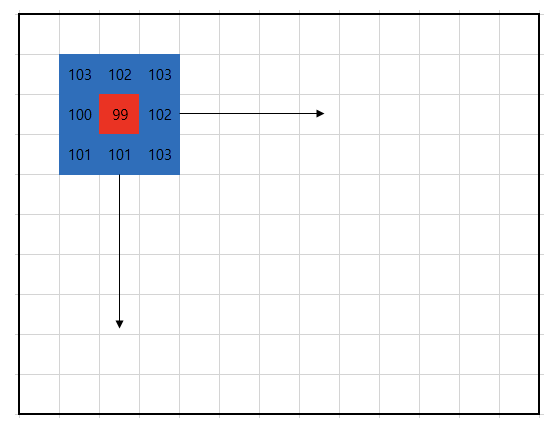  

### 고정점(Anchor Point)
고정점(Anchor Point)은 커널을 통해 컨벌루션된 값을 할당한 지점입니다.  
위 이미지의 빨간색 부분이 고정점이 되며, 빨간색 사각형의 위치는 파란색 사각형을 기준으로 (1, 1)에 위치.

### 테두리 외삽법(Border Extrapolation)
테두리 외삽법(Border Extrapolation)은 컨벌루션을 적용할 때, 이미지 가장자리 부분의 처리 방식을 의미.  

컨벌루션을 적용하면 이미지 가장자리 부분은 계산이 불가능한데, 이 문제를 해결하기 위해 테두리의 이미지 바깥쪽에 가상의 픽셀을 만들어 처리.  

가상 픽셀의 값을 0으로 처리하거나, 임의의 값을 할당하거나, 커널이 연산할 수 있는 부분부터 연산을 수행.

## 가장자리 검출(Edge)


In [11]:
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

sobel = cv2.Sobel(gray, cv2.CV_8U, 1, 0, 3)
laplacian = cv2.Laplacian(gray, cv2.CV_8U, ksize=3)
canny = cv2.Canny(src, 100, 255)

cv2.imshow("sobel", sobel)
cv2.imshow("laplacian", laplacian)
cv2.imshow("canny", canny)
cv2.waitKey()
cv2.destroyAllWindows()

가장자리: 객체의 테두리, 전경(Foreground)과 배경(Background)로 구분되는 지점.
밝기가 큰 폭으로 변하는 지점.

픽셀의 밝기가 급격히 변하는 부분이므로 미분과 기울기 연산을 통해 픽셀의 밝기변화율이 높은 경계선을 찾는다.  

Sobel: 인접한 픽셀들의 차이로 기울기의 크기를 구함.  
Laplacian: 2차 미분의 형태로 가장자리가 밝은 부분에서 발생한 것인지, 어두운 부분에서 발생한 것인지 파악가능.  
Canny: 라플라스 필터방식을 개선한 방식으로 x와 y에 대한 1차 미분을 계산한 다음, 네 방향으로 미분. 네 방향으로 미분한 결과로 극댓값을 갖는 지점들이 가장자리가 됨.
앞서 설명한 가장자리 검출기보다 성능이 월등히 좋으며 노이즈에 민감하지 않아 강한 가장자리를 검출하는 데 목적을 둔 알고리즘.

## HSV(Hue, Saturation, Value)

색상(Hue): 어떤 색인지. 0~179  
채도(Saturation): 색상의 깊이. 선명도. 순수도. 0~255  
명도(Value): 밝고 어두운 정도. 높을수록 밝음. 0~255

### HSV 각 채널별로 출력

In [15]:
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

cv2.imshow("h", h)
cv2.imshow("s", s)
cv2.imshow("v", v)
cv2.waitKey()
cv2.destroyAllWindows()

### 특정색상범위만 출력

In [16]:
h = cv2.inRange(h, 8, 20)
orange = cv2.bitwise_and(hsv, hsv, mask = h)
orange = cv2.cvtColor(orange, cv2.COLOR_HSV2BGR)

cv2.imshow("orange", orange)
cv2.waitKey()
cv2.destroyAllWindows()